## Space Network Intrusion Detection Using CNN-LSTM
###Introduction
In this project, we aim to develop an intrusion detection system for a space network using a Convolutional Neural Network (CNN) and Long Short-Term Memory (LSTM) model. This hybrid approach leverages the strengths of CNNs in feature extraction and LSTMs in handling sequential data, providing a robust solution for detecting anomalies in network traffic.

###Data Generation and Preprocessing
####Synthetic Data Generation

To build our model, we start by generating synthetic network traffic data. This data includes various features such as duration, protocol type, service, flag, source and destination bytes, and several others, along with an outcome label indicating whether the data represents normal or anomalous traffic.

In [4]:
import pandas as pd
import random

def generate_space_network_data(num_records, anomaly_ratio=0.1):
    """
    Generates synthetic space network data with more realistic features and imbalanced classes.

    Args:
        num_records: Number of data points to generate.
        anomaly_ratio: Proportion of data points to be anomalies (0.0 to 1.0).

    Returns:
        A pandas DataFrame containing the synthetic space network data.
    """

    data = []
    protocols = ['TCP', 'UDP', 'SCTP', 'EMRP', 'CFDP', 'SCOS-2000']  # Include space-specific protocols
    services = ['Telemetry', 'Command & Control', 'File Transfer', 'Streaming', 'Routing']
    flags = ['SYN', 'ACK', 'FIN', 'PUSH']  # Omit less common space network flags

    # Define realistic feature value ranges based on domain knowledge (replace with your estimates)
    duration_range = (10, 10000)  # Milliseconds
    byte_count_range = (100, 1000000)
    login_attempts_range = (0, 5)
    error_rates_range = (0.001, 0.1)  # Space networks have lower error rates

    num_anomalies = int(num_records * anomaly_ratio)
    num_normals = num_records - num_anomalies

    for _ in range(num_normals):
        # Generate normal data points
        duration = random.randint(*duration_range)
        protocol_type = random.choice(protocols)
        service = random.choice(services)
        flag = random.choice(flags)
        src_bytes = random.randint(*byte_count_range)
        dst_bytes = random.randint(*byte_count_range)
        land = 0  # Uncommon in space networks
        wrong_fragment = random.randint(0, 1)  # Less frequent
        urgent = random.randint(0, 1)  # Less frequent
        hot = random.randint(0, 3)  # Spacecraft often have dedicated connections
        num_failed_logins = random.randint(*login_attempts_range)
        logged_in = random.randint(0, 1)  # Spacecraft often have pre-established logins
        num_compromised = 0  # Very rare in well-secured space networks (set to 0 for normal data)
        root_shell = 0  # Same as num_compromised
        su_attempted = 0  # Same as num_compromised
        num_root = 0  # Same as num_compromised
        num_file_creations = random.randint(0, 2)  # Spacecraft have limited file systems
        num_shells = 0  # Uncommon in space networks
        num_access_files = random.randint(0, 5)  # Depends on specific operations
        num_outbound_cmds = random.randint(0, 10)  # Depends on mission objectives
        is_host_login = 1  # Spacecraft often have pre-configured logins
        is_guest_login = 0  # Guest logins are rare in space networks
        count = random.randint(1, 100)  # Connection count can vary
        srv_count = random.randint(1, 20)  # Spacecraft typically connect to few servers
        serror_rate = random.uniform(*error_rates_range)
        srv_serror_rate = random.uniform(*error_rates_range)
        rerror_rate = random.uniform(*error_rates_range)
        srv_rerror_rate = random.uniform(*error_rates_range)
        same_srv_rate = random.uniform(0.5, 1.0)  # Spacecraft often communicate with same servers
        diff_srv_rate = random.uniform(0.0, 0.5)
        srv_diff_host_rate = random.uniform(0.0, 0.2)  # Spacecraft connect to few hosts
        dst_host_count = random.randint(1, 5)  # Spacecraft connect to few hosts
        dst_host_srv_count = random.randint(1, 10)  # Limited communication partners
        dst_host_same_srv_rate = random.uniform(0.5, 1.0)
        dst_host_diff_srv_rate = random.uniform(0.0, 0.5)
        dst_host_same_src_port_rate = random.uniform(0.5, 1.0)
        dst_host_srv_diff_host_rate = random.uniform(0.0, 0.2)
        dst_host_serror_rate = random.uniform(*error_rates_range)
        dst_host_srv_serror_rate = random.uniform(*error_rates_range)
        dst_host_rerror_rate = random.uniform(*error_rates_range)
        dst_host_srv_rerror_rate = random.uniform(*error_rates_range)
        outcome = 0  # Normal

        data.append([duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, outcome])

    for _ in range(num_anomalies):
        # Generate anomalous data points
        duration = random.randint(*duration_range)
        protocol_type = random.choice(protocols)
        service = random.choice(services)
        flag = random.choice(flags)
        src_bytes = random.randint(*byte_count_range)
        dst_bytes = random.randint(*byte_count_range)
        land = 0
        wrong_fragment = random.randint(0, 1)
        urgent = random.randint(0, 1)
        hot = random.randint(0, 3)
        num_failed_logins = random.randint(*login_attempts_range)
        logged_in = random.randint(0, 1)
        num_compromised = random.randint(0, 1)  # More likely than in normal data
        root_shell = random.randint(0, 1)
        su_attempted = random.randint(0, 1)
        num_root = random.randint(0, 1)
        num_file_creations = random.randint(0, 2)
        num_shells = random.randint(0, 1)
        num_access_files = random.randint(0, 5)
        num_outbound_cmds = random.randint(0, 10)
        is_host_login = 1
        is_guest_login = random.randint(0, 1)
        count = random.randint(1, 100)
        srv_count = random.randint(1, 20)
        serror_rate = random.uniform(*error_rates_range)
        srv_serror_rate = random.uniform(*error_rates_range)
        rerror_rate = random.uniform(*error_rates_range)
        srv_rerror_rate = random.uniform(*error_rates_range)
        same_srv_rate = random.uniform(0.5, 1.0)
        diff_srv_rate = random.uniform(0.0, 0.5)
        srv_diff_host_rate = random.uniform(0.0, 0.2)
        dst_host_count = random.randint(1, 5)
        dst_host_srv_count = random.randint(1, 10)
        dst_host_same_srv_rate = random.uniform(0.5, 1.0)
        dst_host_diff_srv_rate = random.uniform(0.0, 0.5)
        dst_host_same_src_port_rate = random.uniform(0.5, 1.0)
        dst_host_srv_diff_host_rate = random.uniform(0.0, 0.2)
        dst_host_serror_rate = random.uniform(*error_rates_range)
        dst_host_srv_serror_rate = random.uniform(*error_rates_range)
        dst_host_rerror_rate = random.uniform(*error_rates_range)
        dst_host_srv_rerror_rate = random.uniform(*error_rates_range)
        outcome = 1  # Anomaly

        data.append([duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised, root_shell, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, is_host_login, is_guest_login, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_srv_serror_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate, outcome])

    columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome']

    return pd.DataFrame(data, columns=columns)

# Generate synthetic space network data
space_network_data = generate_space_network_data(20000, anomaly_ratio=0.1)
space_network_data.to_csv('synthetic_space_network_data.csv', index=False)


**Data Preprocessing**

Once the synthetic data is generated, we preprocess it to ensure it is suitable for training our machine learning model. The preprocessing steps include:
- **Scaling Numerical Features:** We use the `RobustScaler` to normalize the numerical features, reducing the influence of outliers.
- **Encoding Categorical Features:** Categorical features such as protocol type, service, and flag are encoded using `LabelEncoder` and one-hot encoding to convert them into a format suitable for the model.
- **Handling Imbalanced Data:** We use the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset, ensuring that the model is trained on an equal distribution of normal and anomalous traffic.

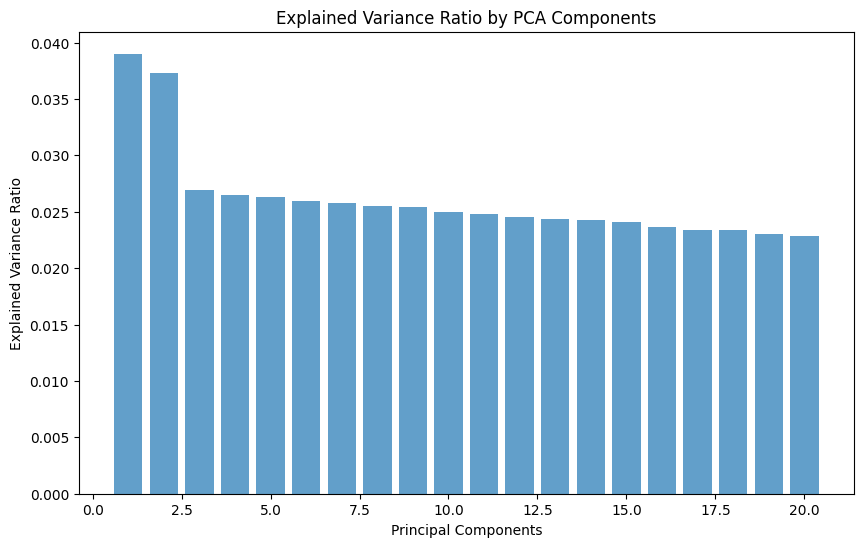

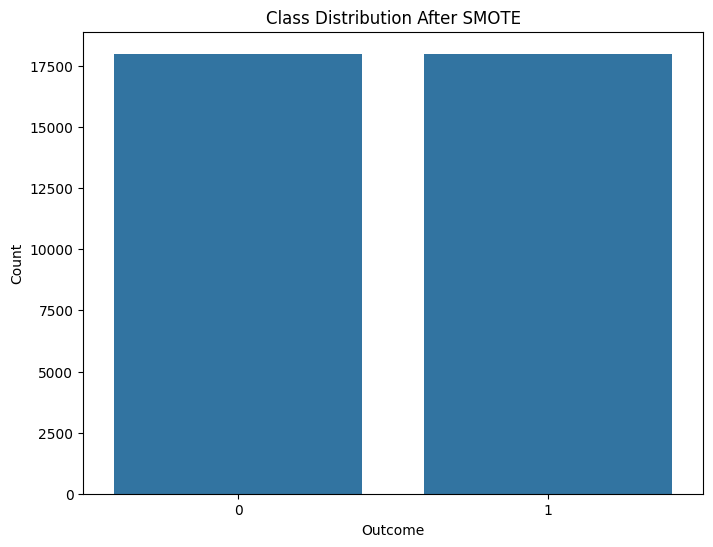

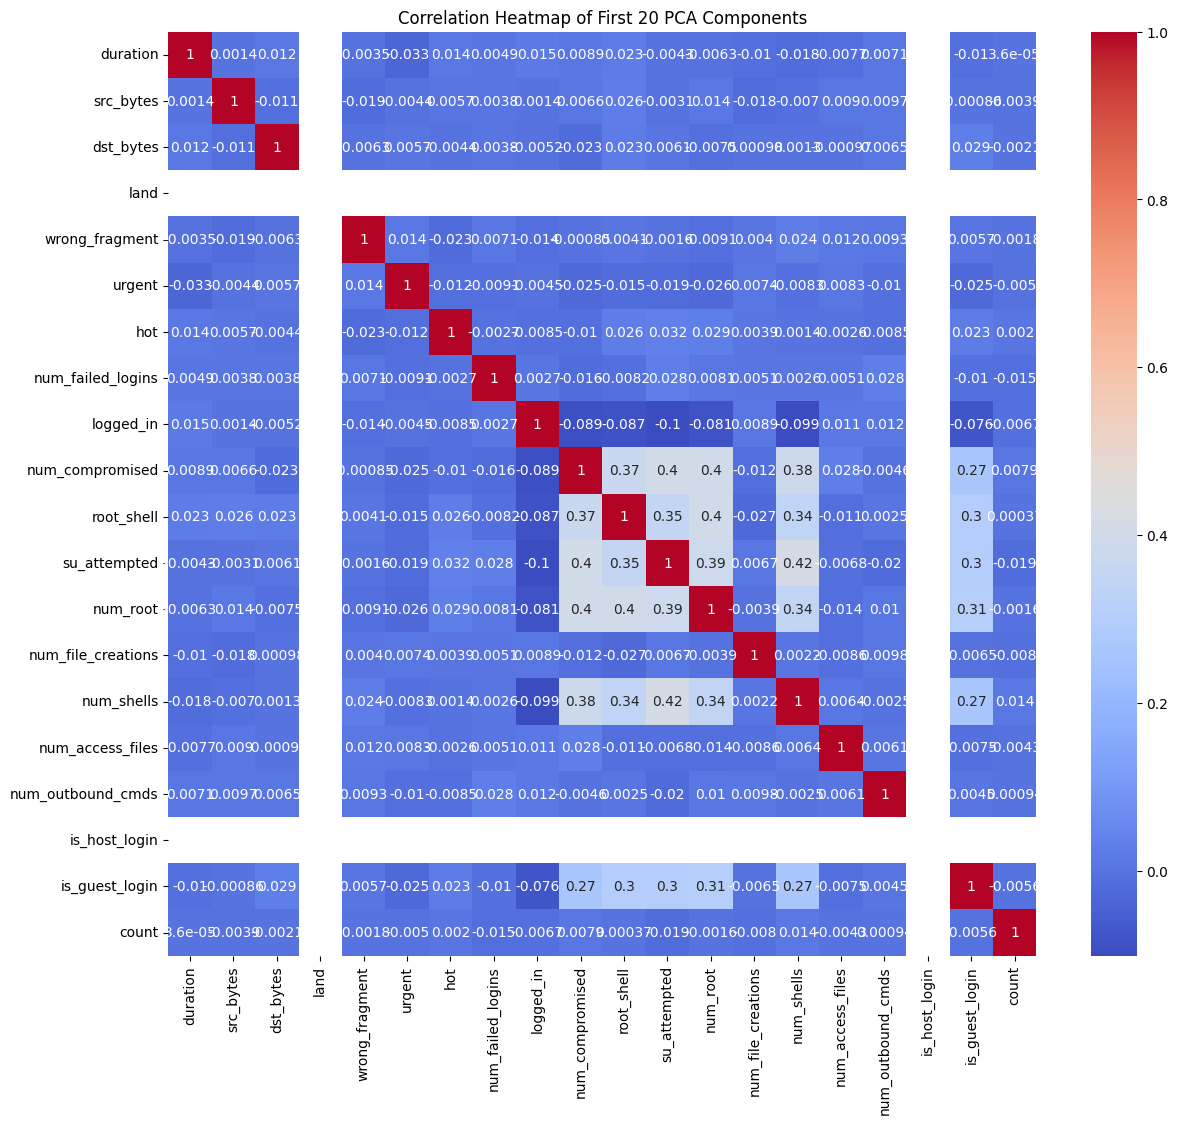

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the synthetic data
space_network_data = pd.read_csv('synthetic_space_network_data.csv')

def preprocess_space_network_data(dataframe):
    cat_cols = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login', 'outcome']
    num_cols = dataframe.drop(cat_cols, axis=1).columns

    # Scaling numerical features
    scaler = RobustScaler()
    dataframe[num_cols] = scaler.fit_transform(dataframe[num_cols])

    # Encode categorical features
    for col in cat_cols:
        le = LabelEncoder()
        dataframe[col] = le.fit_transform(dataframe[col])

    # One-hot encoding for specific columns
    dataframe = pd.get_dummies(dataframe, columns=['protocol_type', 'service', 'flag'])

    return dataframe

# Process the data
processed_data = preprocess_space_network_data(space_network_data)

# Split data into features and labels
X = processed_data.drop('outcome', axis=1)
y = processed_data['outcome']

# Apply SMOTE for balancing the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dimensionality reduction with PCA
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X_resampled)

# Visualize explained variance ratio by PCA components
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), pca.explained_variance_ratio_, alpha=0.7, align='center')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_resampled, test_size=0.2, random_state=42)

# Visualize class distribution after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

# Visualize correlation heatmap of a subset of features (first 20 features)
plt.figure(figsize=(14, 12))
correlation_matrix = pd.DataFrame(X_resampled).iloc[:, :20].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of First 20 PCA Components')
plt.show()


### Model Architecture

**CNN-LSTM Model Design**

Our model architecture combines CNN and LSTM layers to effectively handle the characteristics of network traffic data:
- **Convolutional Layer (Conv1D):** Extracts local features from the input data.
- **MaxPooling Layer:** Reduces the dimensionality of the feature maps, retaining only the most critical information.
- **LSTM Layers:** Captures sequential dependencies in the data, which is essential for identifying patterns in network traffic.
- **Dropout Layers:** Prevents overfitting by randomly setting a fraction of input units to zero during training.
- **Dense Layers:** Fully connected layers that lead to the final output.

Epoch 1/20
900/900 [==============================] - 29s 25ms/step - loss: 0.1534 - accuracy: 0.9355 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 2/20
900/900 [==============================] - 21s 23ms/step - loss: 0.0717 - accuracy: 0.9776 - val_loss: 0.0563 - val_accuracy: 0.9835
Epoch 3/20
900/900 [==============================] - 19s 22ms/step - loss: 0.0659 - accuracy: 0.9797 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 4/20
900/900 [==============================] - 18s 20ms/step - loss: 0.0596 - accuracy: 0.9823 - val_loss: 0.0443 - val_accuracy: 0.9869
Epoch 5/20
900/900 [==============================] - 20s 22ms/step - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.0462 - val_accuracy: 0.9869
Epoch 6/20
900/900 [==============================] - 18s 20ms/step - loss: 0.0529 - accuracy: 0.9847 - val_loss: 0.0394 - val_accuracy: 0.9883
Epoch 7/20
900/900 [==============================] - 18s 20ms/step - loss: 0.0499 - accuracy: 0.9851 - val_loss: 0.0467 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


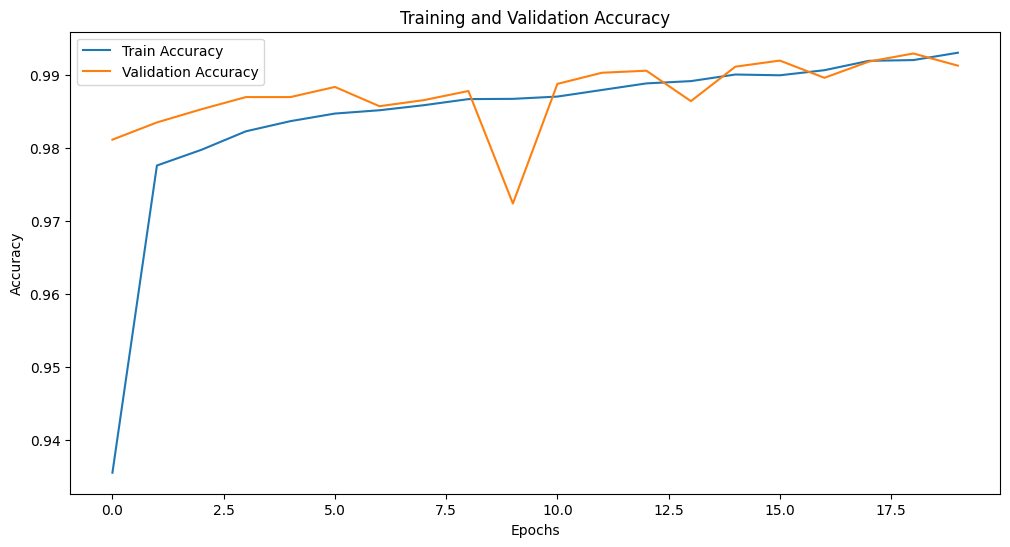

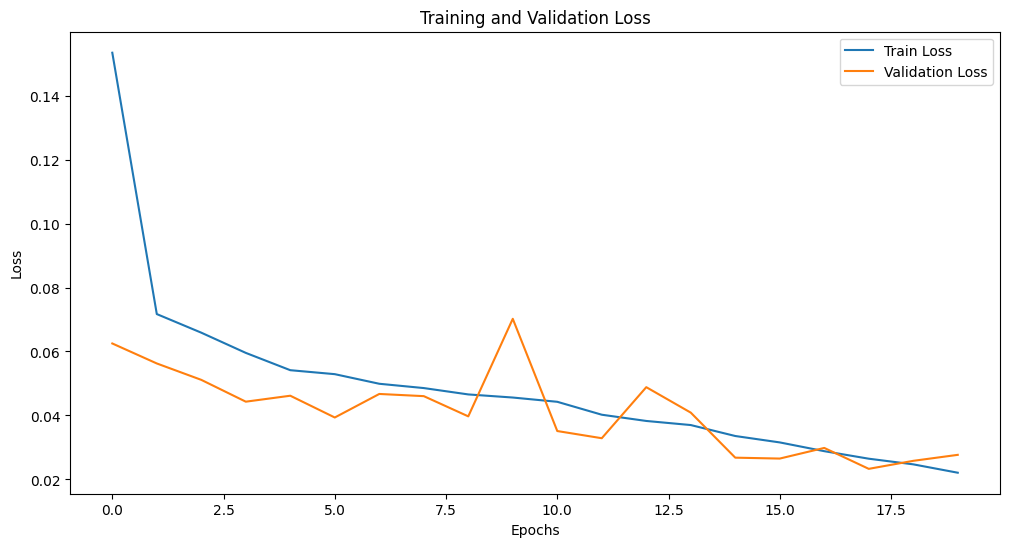

In [5]:
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data for CNN-LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Save the model
model.save('cnn_lstm_model.h5')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Evaluating Model Performance**

We evaluate the model's performance using several metrics:
- **Accuracy:** Measures the overall correctness of the model.
- **Precision:** Indicates how many of the predicted positive cases were actually positive.
- **Recall:** Measures the ability of the model to identify positive cases.
- **F1 Score:** Harmonic mean of precision and recall, providing a single metric that balances both concerns.

**Visualizing Training Results**

We plot the training and validation loss over epochs to visualize the model's learning process and ensure it is not overfitting. Additionally, confusion matrices and ROC curves are used to provide a more detailed assessment of the model's performance.

225/225 [==============================] - 3s 6ms/step
Accuracy: 0.9927777777777778
Precision: 0.9977559607293127
Recall: 0.9877811718966953
F1 Score: 0.9927435110242813


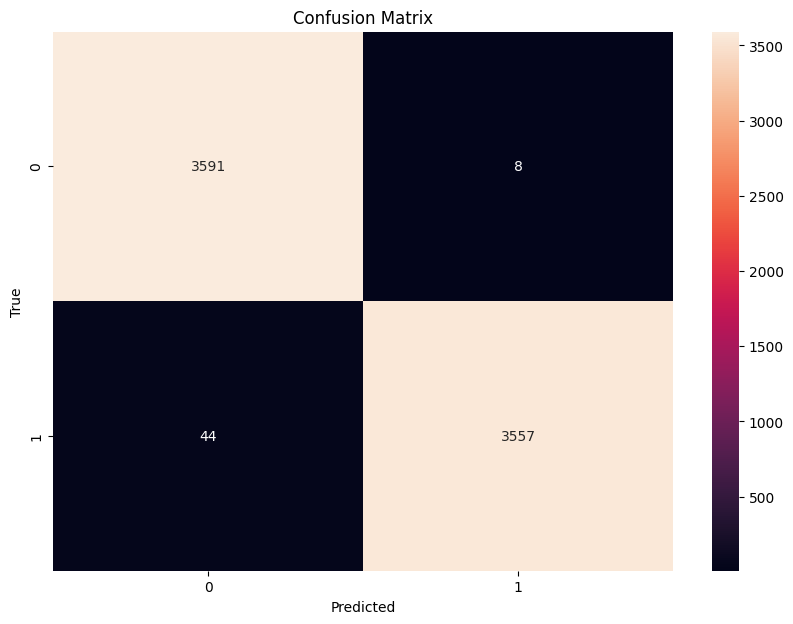

In [ ]:
# Load the model
model = load_model('cnn_lstm_model.h5')

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype('int')

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
